[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/jayyanar/genai-apps/blob/main/lab0_embedding_demo.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jayyanar/genai-apps/)

In [ ]:
! pip install gensim --quiet

In [ ]:
! pip install altair cohere pandas numpy vega  sklearn matplotlib mpl_toolkits --quiet

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Example Simple Word--quiet -- for Tokenize and apply Vectorizing using Word2Vec

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import tokenize

# Prepare a list of sentences (corpus)
corpus = [
    "cat",
    "dog",
    "fruit",
    "banana"
]

# Preprocess the corpus by tokenizing the sentences
tokenized_corpus = [list(tokenize(sentence)) for sentence in corpus]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Get the vector representation of a word
word = "dog"
word_vector = model.wv[word]
print(f"Vector representation of '{word}':\n{word_vector}\n")

# Find similar words based on cosine similarity
similar_words = model.wv.most_similar(word)
print(f"Similar words to '{word}':")
for sim_word, sim_score in similar_words:
    print(f"{sim_word}: {sim_score}")

# Check the vocabulary size
vocabulary_size = len(model.wv)
print("\nVocabulary size:", vocabulary_size)

# Get the entire word vocabulary
vocabulary = model.wv.key_to_index
print("\nWord Vocabulary:")
for word in vocabulary:
    print(word)

Vector representation of 'dog':
[ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 -1.3754654e-03
  7.6685809e-03  7.3464094e-03 -3.6732971e-03  2.6427018e-03
 -8.3171297e-03  6.2054861e-03 -4.6373224e-03 -3.1641065e-03
  9.3113566e-03  8.7338570e-04  7.4907029e-03 -6.0740625e-03
  5.1605068e-03  9.9228229e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648370e-03 -4.8626517e-03 -3.7785638e-03 -8.5361991e-03
  7.9556061e-03 -4.8439382e-03  8.4236134e-03  5.2625705e-03
 -6.5500261e-03  3.9578713e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257253e-03 -1.5815723e-03
 -4.0343284e-04  3.2996845e-03  1.4418805e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936908e-03
  3.9735902e-03  4.5294715e-03  1.4343059e-03 -2.6998555e-03
 -4.3668128e-03 -1.0320747e-03  1.4370275e-03 -2.6460087e-03
 -7.0737829e-03 -7.8053069e-03 -9.1217868e-03 -5.9351693e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606704e-03 -3.7173224e-03
  4.2891586e-03 -3.7390434e-03  8.3781751e-03  1.5339

## Example Sentence - Tokenize and Vectorize

<ipython-input-7-b55c8b8fb86c>:62: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Normalized Values')


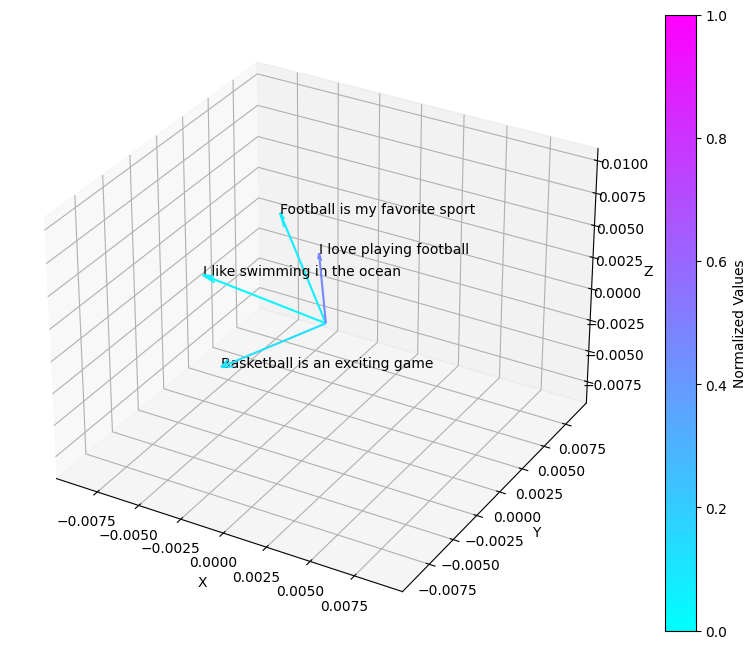

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from matplotlib.cm import cool

# Corpus
corpus = [
    "I love playing football",
    "Football is my favorite sport",
    "Basketball is an exciting game",
    "I like swimming in the ocean"
]

# Train Word2Vec model
model = Word2Vec([sentence.split() for sentence in corpus], min_count=1)

# Get word embeddings
vectors = np.array([model.wv[word] for sentence in corpus for word in sentence.split()])

# Origin point
origin = np.array([0, 0, 0])

# Initialize the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalize vectors for color mapping
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_vectors = scaler.fit_transform(vectors)

# Plot vectors with color mapping
for vector, text, norm_vector in zip(vectors, corpus, normalized_vectors):
    ax.quiver(origin[0], origin[1], origin[2],
              vector[0], vector[1], vector[2],
              arrow_length_ratio=0.1, color=cool(norm_vector[0]))

    ax.text(vector[0], vector[1], vector[2], text)

# Set plot limits
max_range = np.array([vectors[:,0].max()-vectors[:,0].min(),
                     vectors[:,1].max()-vectors[:,1].min(),
                     vectors[:,2].max()-vectors[:,2].min()]).max() / 2.0

mid_x = (vectors[:,0].max()+vectors[:,0].min()) * 0.5
mid_y = (vectors[:,1].max()+vectors[:,1].min()) * 0.5
mid_z = (vectors[:,2].max()+vectors[:,2].min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set color bar
sm = plt.cm.ScalarMappable(cmap=cool)
sm.set_array([])  # Empty array since the color mapping is done in the quiver plot
plt.colorbar(sm, label='Normalized Values')

# Show the plot
plt.show()

In [ ]:
! pip install cohere altair  --quiet

In [ ]:
import cohere
import pandas as pd
import numpy as np
import altair as alt

# Create a JSON File Name cred.json in below format

# {"cohere_api_key": "*****************","dreamstudio_api_key": "**********"}

# OR

# store the key directly

# apikey = "*****************"

In [ ]:
# import json
# filepath = "cred.json"
# file = open(filepath, 'r')

# # Open the credentials file with json.load
# credentials = json.load(file)
# file.close()

# Load API Key
api_key = "***********************"

In [ ]:
co = cohere.Client(api_key)

## Let us try with corpus of data from CSV File

In [ ]:
# Load the dataset to a dataframe
df_orig = pd.read_csv('https://raw.githubusercontent.com/cohere-ai/notebooks/main/notebooks/data/atis_intents_train.csv',names=['intent','query'])

# Take a small sample for illustration purposes
sample_classes = ['atis_airfare', 'atis_airline', 'atis_ground_service']
df = df_orig.sample(frac=0.12, random_state=30)
df = df[df.intent.isin(sample_classes)]
df_orig = df_orig.drop(df.index)
df.reset_index(drop=True,inplace=True)

# Remove unnecessary column
intents = df['intent'] #save for a later need
df.drop(columns=['intent'], inplace=True)
df.head()

,query
0,which airlines fly from boston to washington ...
1,show me the airlines that fly between toronto...
2,show me round trip first class tickets from n...
3,i'd like the lowest fare from denver to pitts...
4,show me a list of ground transportation at bo...


In [ ]:
# Get text embeddings
def get_embeddings(texts,model='embed-english-v2.0'):
  output = co.embed(
                model=model,
                texts=texts)
  return output.embeddings

In [ ]:

# Embed the dataset
df['query_embeds'] = get_embeddings(df['query'].tolist())
df.head()

,query,query_embeds
0,which airlines fly from boston to washington ...,"[-0.29418945, 0.3930664, 0.76464844, -0.722167..."
1,show me the airlines that fly between toronto...,"[0.72265625, -0.30395508, 0.54296875, 0.904296..."
2,show me round trip first class tickets from n...,"[-1.1162109, -0.6743164, -0.111694336, -0.2362..."
3,i'd like the lowest fare from denver to pitts...,"[0.87353516, -0.5004883, 0.734375, -1.1494141,..."
4,show me a list of ground transportation at bo...,"[-2.2753906, -0.21533203, -1.0986328, 0.472656..."


In [ ]:
# Reduce dimensionality using PCA
from sklearn.decomposition import PCA

# Function to return the principal components
def get_pc(arr,n):
  pca = PCA(n_components=n)
  embeds_transform = pca.fit_transform(arr)
  return embeds_transform

In [ ]:
# Reduce embeddings to 10 principal components to aid visualization
embeds = np.array(df['query_embeds'].tolist())
embeds_pc = get_pc(embeds,10)

In [ ]:
# Calculate cosine similarity between the search query and existing queries

from sklearn.metrics.pairwise import cosine_similarity

def get_similarity(target,candidates):
  # Turn list into array
  candidates = np.array(candidates)
  target = np.expand_dims(np.array(target),axis=0)

  # Calculate cosine similarity
  sim = cosine_similarity(target,candidates)
  sim = np.squeeze(sim).tolist()
  sort_index = np.argsort(sim)[::-1]
  sort_score = [sim[i] for i in sort_index]
  similarity_scores = zip(sort_index,sort_score)

  # Return similarity scores
  return similarity_scores

In [ ]:
# Add new query
new_query = "show business fares"

# Get embeddings of the new query
new_query_embeds = get_embeddings([new_query])[0]

In [ ]:
# Get the similarity between the search query and existing queries
sample = 9
similarity = get_similarity(new_query_embeds,embeds[:sample])

# View the top 5 articles
print('Query:')
print(new_query,'\n')

print('Similar queries:')
for idx,sim in similarity:
  print(f'Similarity: {sim:.2f};',df.iloc[idx]['query'])

Query:
show business fares 

Similar queries:
Similarity: 0.52;  show me round trip first class tickets from new york to miami
Similarity: 0.48;  i'd like the lowest fare from denver to pittsburgh
Similarity: 0.40;  i would like your rates between atlanta and boston on september third
Similarity: 0.40;  show me the airlines that fly between toronto and denver
Similarity: 0.37;  show me boston ground transportation
Similarity: 0.34;  show me a list of ground transportation at boston airport
Similarity: 0.32;  which airlines fly from boston to washington dc via other cities
Similarity: 0.24;  what ground transportation is available in boston
Similarity: 0.23;  of all airlines which airline has the most arrivals in atlanta


In [ ]:
# Create new dataframe and append new query
df_sem = df.copy()
df_sem.loc[len(df_sem.index)] = [new_query, new_query_embeds]

# Reduce embeddings dimension to 2
embeds_sem = np.array(df_sem['query_embeds'].tolist())
embeds_sem_pc2 = get_pc(embeds_sem,2)

# Add the principal components to dataframe
df_sem_pc2 = pd.concat([df_sem, pd.DataFrame(embeds_sem_pc2)], axis=1)

In [ ]:
# Function to generate the 2D plot
def generate_chart(df,xcol,ycol,lbl='on',color='basic',title=''):
  chart = alt.Chart(df).mark_circle(size=500).encode(
    x=
    alt.X(xcol,
        scale=alt.Scale(zero=False),
        axis=alt.Axis(labels=False, ticks=False, domain=False)
    ),

    y=
    alt.Y(ycol,
        scale=alt.Scale(zero=False),
        axis=alt.Axis(labels=False, ticks=False, domain=False)
    ),

    color= alt.value('#333293') if color == 'basic' else color,
    tooltip=['query']
    )

  if lbl == 'on':
    text = chart.mark_text(align='left', baseline='middle',dx=15, size=13,color='black').encode(text='query', color= alt.value('black'))
  else:
    text = chart.mark_text(align='left', baseline='middle',dx=10).encode()

  result = (chart + text).configure(background="#FDF7F0"
        ).properties(
        width=800,
        height=500,
        title=title
       ).configure_legend(
  orient='bottom', titleFontSize=18,labelFontSize=18)

  return result

In [ ]:
# Create column for representing chart legend
df_sem_pc2['Source'] = 'Existing'
df_sem_pc2.at[len(df_sem_pc2)-1, 'Source'] = "New"

# Plot on a chart
df_sem_pc2.columns = df_sem_pc2.columns.astype(str)
selection = list(range(sample)) + [-1]
generate_chart(df_sem_pc2.iloc[selection],'0','1',color='Source',title='Semantic Search')

alt.LayerChart(...)

In [ ]:
# Reduce embeddings to 2 principal components to aid visualization
embeds_pc2 = get_pc(embeds,2)

# Add the principal components to dataframe
df_pc2 = pd.concat([df, pd.DataFrame(embeds_pc2)], axis=1)

# Plot the 2D embeddings on a chart
df_pc2.columns = df_pc2.columns.astype(str)
generate_chart(df_pc2.iloc[:sample],'0','1',title='2D Embeddings')

alt.LayerChart(...)

In [ ]:
from sklearn.cluster import KMeans

# Pick the number of clusters
df_clust = df_pc2.copy()
n_clusters=2

# Cluster the embeddings
kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
classes = kmeans_model.fit_predict(embeds).tolist()
df_clust['cluster'] = (list(map(str,classes)))

# Plot on a chart
df_clust.columns = df_clust.columns.astype(str)
generate_chart(df_clust.iloc[:sample],'0','1',lbl='on',color='cluster',title='Clustering with 2 Clusters')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


alt.LayerChart(...)